## Numpy

In [3]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np

arr1 = np.array([1,2,3]) # 1차원 배열 (하나의 컬럼 데이터)

arr1
type(arr1) # numpy.ndarray

arr1.shape # 데이터 구조
arr1.ndim # 1차원 => Series()

1

In [10]:
arr2 = np.array([[1,2,3], [4,5,6]])

arr2

arr2.shape # 2행 3열 (컬럼 3개, 행 2개)
arr2.ndim # 2차원 => DataFrame()

2

In [12]:
# np.array([1,2,3]) 의 구조가 왜 (3,1)인지 잘 이해가 가지 않습니다. 
# 그 반대 (1행, 3열)이 되어야하는거 아닌가요?
arr1.shape

(3,)

In [20]:
# 데이터 타입
data = [1, 2, 3.0]

arr = np.array(data)
arr.dtype # U: 문자열

dtype('float64')

In [24]:
data = ['1', '2', '3'] 

arr = np.array(data)
arr.dtype

# 타입 변경 함수: astype()
arr.astype('float')

array([1., 2., 3.])

In [37]:
# boolean indexing

arr = np.arange(10)

arr[0:5]
arr[6:]

arr > 5
# [False, False, False, False, False, False,  True,  True,  True, True]
arr[(arr <= 3) & (arr>=7)] # 쿼리 = 데이터 조회

# 조건부호: | (or), & (and)

array([], dtype=int64)

In [40]:
arr = np.array([10, 30, 20, 100, 0])

np.sort(arr) # 오름차순
np.sort(arr)[::-1] # 내림차순

array([100,  30,  20,  10,   0])

In [44]:
arr = np.array(["korea", "singapole", "china", "japan"])

np.sort(arr) # 문자 비교: 맨 앞글자를 기준으로 정렬
# 알파벳의 맨 앞글자를 숫자로 나타낸 결과값을 = 유니코드 코드 포인트

array(['china', 'japan', 'korea', 'singapole'], dtype='<U9')

In [48]:
# np.unique()

arr = np.array([1,2,3,3,3,5,5,7,8,9,9])
np.unique(arr)

array([1, 2, 3, 5, 7, 8, 9])

## Pandas 

In [49]:
!pip install pandas

Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized



In [50]:
import pandas as pd

In [51]:
pd.__version__

'1.4.4'

In [65]:
# Series - 1개의 컬럼으로 구성된 1차원 데이터 셋
data = [1,2,3,4,5]

se = pd.Series(data)

se.index
se.values

se[0:3]

se.name = "Column Name" # Series 이름
se.index.name = "No."
se

se[se > 3] # boolean indexing

No.
3    4
4    5
Name: Column Name, dtype: int64

In [68]:
# DataFrame - 2차원 데이터

data = {
    'country' : ["kor", "usa", "china", "japan"],
    'rank' : [1,2,3,4],
    'grade' : ["A", "B", "C", "D"],
}

df = pd.DataFrame(data)
df

,country,rank,grade
0,kor,1,A
1,usa,2,B
2,china,3,C
3,japan,4,D


In [77]:
# 1. 데이터 셀랙션 => 내가 원하는 범위의 데이터를 불러오는 방법
# (1) df.컬럼명, df['컬럼명']

# df.country
# df['country']

need_col = ['country', 'rank']
df[need_col]

df[['country', 'rank']]

KeyError: ('country', 'rank')

In [85]:
# (2) df.loc[인덱스값, 컬럼명]

df.loc[0] # 1행 데이터
df.loc[0, 'country'] # 1행 데이터
df.loc[df['rank']<=2, ['country', 'rank']]

,country,rank
0,kor,1
1,usa,2


In [86]:
df['rank']<=2

0     True
1     True
2    False
3    False
Name: rank, dtype: bool

In [93]:
# (3) df.iloc[인덱스값, 컬럼인덱스값]

df.iloc[0, 0:2] # [0,2,5]

country    kor
rank         1
Name: 0, dtype: object

In [99]:
df[(df['rank'] > 2) | (df['grade'] == 'B')] # query:SQL

,country,rank,grade
1,usa,2,B
2,china,3,C
3,japan,4,D


In [106]:
# 데이터를 생성 (Create) - 행, 컬럼(파생컬럼)
# 대통령 정보가 있으면 좋을 거 같아

# df['president'] = ['yoon', 'trump', 'jinping', 'kishida']
# df

# rank가 3보다 크면 good 컬럼 => True,False

df['good'] = df['rank'] >= 3
df

,country,rank,grade,president,good
0,kor,1,A,yoon,False
1,usa,2,B,trump,False
2,china,3,C,jinping,True
3,japan,4,D,kishida,True


In [107]:
df['gdp'] = df['rank'] * 1000
df

,country,rank,grade,president,good,gdp
0,kor,1,A,yoon,False,1000
1,usa,2,B,trump,False,2000
2,china,3,C,jinping,True,3000
3,japan,4,D,kishida,True,4000


In [110]:
# 행 데이터는 어떻게 추가할 것인가?
df.loc[4] = ['singapole', 2, 'B', 'jacob', True, 2000]
df

,country,rank,grade,president,good,gdp
0,kor,1,A,yoon,False,1000
1,usa,2,B,trump,False,2000
2,china,3,C,jinping,True,3000
3,japan,4,D,kishida,True,4000
4,singapole,2,B,jacob,True,2000


In [119]:
# 삭제 => 행 또는 열을 삭제 => df.drop?

# 행 데이터 삭제
df.drop([0,1]) # 행

# 컬럼 데이터 삭제
# df.drop(['country','rank'], axis=1) # 컬럼

df.drop(columns=['good', 'gdp'])

,country,rank,grade,president
0,kor,1,A,yoon
1,usa,2,B,trump
2,china,3,C,jinping
3,japan,4,D,kishida
4,singapole,2,B,jacob
10,singapole,2,B,jacob


In [122]:
# 데이터 업데이트 => X
df.loc[0, 'rank'] = 3
df

# 그러면 원본데이터를 건드리지않고 전부 copy를 해서 쓰나요?

,country,rank,grade,president,good,gdp
0,kor,3,A,yoon,False,1000
1,usa,2,B,trump,False,2000
2,china,3,C,jinping,True,3000
3,japan,4,D,kishida,True,4000
4,singapole,2,B,jacob,True,2000
10,singapole,2,B,jacob,True,2000


In [125]:
# 어느 순간부터 'good' 칼럼이 True = 1, False = 0으로 표시가 되는데 이런 현상이 왜 발생하는건가요??

df['good'].astype('bool')

0     False
1     False
2      True
3      True
4      True
10     True
Name: good, dtype: bool

In [133]:
# 연습문제 => 4시 10분
# 원본 데이터에서 입력자체를 잘못하여 추가한 것을 지우려고 하면 어떻게 하면 되나요?? drop함수는 원본 자체에는 영향을 주는 것 같지 않아서 질문드립니다!
# 다시 변수에 저장하면 되는 것으로 알고 있습니다.
# df_new = df.drop(columns =['good', 'gdp'])
df

,country,rank,grade,president
0,kor,3,A,yoon
1,usa,2,B,trump
2,china,3,C,jinping
3,japan,4,D,kishida
4,singapole,2,B,jacob
10,singapole,2,B,jacob


In [141]:
# 집합함수 (Aggregation) => 기술통계

df.sum()
df.mean(numeric_only=True)
df.max()
df.min()

df.describe() # 숫자 데이터 타입의 기술 통계를 한번에 계산해줌.
df.info()

# 통계학의 모든 가정 => 통계학은 어떤 걸 가정하고 있죠!?
# => 통계는 정규분포를 따를 때의 가정을 하고있죠.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 10
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    6 non-null      object
 1   rank       6 non-null      int64 
 2   grade      6 non-null      object
 3   president  6 non-null      object
dtypes: int64(1), object(3)
memory usage: 412.0+ bytes


In [150]:
# 데이터 정렬
df.sort_values(['rank', 'grade'], ascending=False)

# by= 안하고 컬럼명 []으로 묶어줘도 되나요?

,country,rank,grade,president
3,japan,4,D,kishida
2,china,3,C,jinping
0,kor,3,A,yoon
1,usa,2,B,trump
4,singapole,2,B,jacob
10,singapole,2,B,jacob


In [154]:
# 실제 데이터를 다루다보면 => NaN(Not a number), None, Null
# 비어있는 데이터를 어떻게 처리할 것인가?
# (1) 값을 채우거나
# - mean/median 으로 바꿔주지는 않나요??

# (2) 해당 행 데이터를 제거하거나

# 커뮤니케이션 상대가 있어요. => 본인이 고민 => 원숭이를 던지는거죠.(몽키 비즈니스)
# df.loc[0, 'grade'] = np.NaN
df

,country,rank,grade,president
0,kor,3,NaN,yoon
1,usa,2,B,trump
2,china,3,C,jinping
3,japan,4,D,kishida
4,singapole,2,B,jacob
10,singapole,2,B,jacob


In [156]:
# 널 데이터 체크가 필요
df.isna().sum()

country      0
rank         0
grade        1
president    0
dtype: int64

In [161]:
# null 데이터를 제거한다.
# df.dropna(how='all') #all: 전체 행 데이터가 na일때 제거
# df.dropna(how='any') #any: 행 데이터가 하나라도 na면 제거

# 데이터를 채워넣는다.
# df.fillna(value=df['rank'].mean(), inplace=True)
# df['rank'].fillna(value=df['rank'].mean(), inplace=True)

df.isna().sum()

country      0
rank         0
grade        0
president    0
dtype: int64

### 연습문제

In [162]:
import pandas as pd

data = {
    '영화' : ['명량', '극한직업', '신과함께-죄와 벌', '국제시장', '괴물', '도둑들', '7번방의 선물', '암살'],
    '개봉 연도' : [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
    '관객 수' : [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270], # (단위 : 만 명)
    '평점' : [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10]
}
df = pd.DataFrame(data)
df

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


In [168]:
### 1) 전체 데이터 중에서 '영화' 정보만 출력하시오.
### 2) 전체 데이터 중에서 '영화','평점' 정보를 출력하시오.

df.영화
df[['영화', '평점']]

,영화,평점
0,명량,8.88
1,극한직업,9.20
2,신과함께-죄와 벌,8.73
3,국제시장,9.16
4,괴물,8.62
5,도둑들,7.64
6,7번방의 선물,8.83
7,암살,9.10


In [187]:
### 3) 2015년 이후에 개봉한 영화 데이터 중에서 '영화','개봉연도' 정보를 출력하시오.

조건 = df['개봉 연도'] > 2015
# df_2015 = df[조건]
# df_2015[['영화','개봉 연도']]

df.loc[조건, ['영화','개봉 연도']]

,영화,개봉 연도
1,극한직업,2019
2,신과함께-죄와 벌,2017


In [205]:
### 4) 주어진 계산식을 참고하여 '추천 점수' Column을 추가하시오.
### 추천 점수 = (관객수 * 평점) // 100
### 5) 전체 데이터를 '추천 점수' 기준 내림차순으로 출력하시오.

df['추천 점수'] = (df['관객 수'] * df['평점']) // 100

# Top3
df.sort_values(by=['추천 점수'], ascending=False).head(3)

,영화,개봉 연도,관객 수,평점,추천 점수
0,명량,2014,1761,8.88,156.0
1,극한직업,2019,1626,9.20,149.0
3,국제시장,2014,1426,9.16,130.0


## 와인 데이터

(1) 판다스 심화
- 실제 데이터로 연습 => 응용 질문

(2) 시각화
- matplotlib, seaborn, pyplot

내일
- 전체 복습
- AI 툴 소개 (pandasAI, surfWind, GPT를 활용한 데이터 분석)
- 실전 데이터로 연습

In [2]:
import pandas as pd

df = pd.read_csv('winequality.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
# (2) 기술통계 정보를 출력해보세요.

# df.info()
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [20]:
# 와인의 등급(quality)별로 데이터가 몇 개씩 있는지 출력해보세요.
# - 와인의 등급의 유니크한 값에 대해서 파악

# df['quality'].unique()
# df_quality_3 = df[df['quality']==3]
# df_quality_4 = df[df['quality']==4]
# df[df['quality']==5]
# df[df['quality']==6]

df['type'].value_counts()
df['quality'].value_counts().to_frame()

# value_counts(): 컬럼의 데이터별 갯수를 파악할 때 사용
# to_frame(): 시리즈 형태의 데이터 타입을 데이터 프레임으로 변경

,quality
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


In [43]:
# 각 와인의 타입(type)별로 평균 알코올 도수(alcohol)와 평균 당도(residual sugar)를 구해보세요.
# df['type'].value_counts()
# 화이트 와인이 레드 와인보다 더 달 것이다.

# df[df['type'] == 'red']['alcohol'].mean() # 10.42
# df[df['type'] == 'white']['alcohol'].mean() # 10.51

# groupby()
df.groupby(by=['type'])[['residual sugar', 'residual sugar']].mean()
# df['type'].unique()

,residual sugar,residual sugar
type,,
red,2.538806,2.538806
white,6.393250,6.393250


In [53]:
# Q1. 와인의 등급별 평균 당도는 어떻게 됩니까?
df.groupby(by='quality')['residual sugar'].mean()
# - 당도라는 것은 와인의 등급에 미치는 영향이 낮을 것이다.

# Q2. 와인의 등급별(quality)로 타입별(type) 각각 평균 당도는 어떻게 됩니까?
df.groupby(by=['quality', 'type'])['residual sugar'].mean()

quality  type 
3        red      2.635000
         white    6.392500
4        red      2.694340
         white    4.628221
5        red      2.528855
         white    7.334969
6        red      2.477194
         white    6.443855
7        red      2.720603
         white    5.189761
8        red      2.577778
         white    5.671429
9        white    4.120000
Name: residual sugar, dtype: float64

In [48]:
# df[['alcohol', 'residual sugar']].groupby(by=['type']).mean() 
# <== 이렇게 했을때 (KeyError: 'type') 이러한 오류가 뜨는데 왜 KeyError의 오류가 뜨는지 알 수 있을까요?
# df[['alcohol', 'residual sugar', 'type']].groupby('type').mean()
# df.groupby(['type'])[['residual sugar', 'residual sugar']].mean()

,alcohol,residual sugar
type,,
red,10.422983,2.538806
white,10.514267,6.393250


In [58]:
# (5) 'alcohol' 열의 평균값을 계산하세요
# (6) 'pH' 열의 표준편차를 계산하세요.
df['alcohol'].mean()
df['pH'].std()

0.16074830655088293

In [64]:
# (7) 'residual sugar' 열에서 최대값(max)과 최소값(min)의 차이를 계산하세요.
df['residual sugar'].max() - df['residual sugar'].min()

65.2

In [72]:
# (9) 'fixed acidity' 열과 'pH' 열의 값이 각각 3 이상, 
# 4이상 인 데이터만 추출하여 데이터 프레임을 생성하시오.

조건 = (df['fixed acidity'] >= 3) & (df['pH'] >=4)

df_조건 = df[조건]
# df_조건.describe()
df_조건

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2.000000,2.00,2.0,2.0,2.000,2.0,2.0,2.00000,2.00,2.00,2.0,2.0
mean,5.200000,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6.0
std,0.282843,0.00,0.0,0.0,0.000,0.0,0.0,0.00000,0.00,0.00,0.0,0.0
min,5.000000,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6.0
25%,5.100000,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6.0
50%,5.200000,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6.0
75%,5.300000,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6.0
max,5.400000,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6.0


In [88]:
# (10) 'volatile acidity' 열의 값이 0.5 이하인 데이터의 'quality' 열의 평균을 계산하세요.

# round(df[df['volatile acidity'] <= 0.5]['quality'].mean(), 2)
df[df['volatile acidity'] <= 0.5]['quality'].mean()

5.897160538769567

## NBA 농구선수 데이터
- NBA 선수들의 인적정보,연봉,출신학교 등의 데이터가 제공됩니다.
- 만약 여러분들이 에이전트 운영을 하고 있다면, 어떤 선수를 어떤 팀에 스카웃을 하거나, 팔거나 하면 좋으지에 대한 분석
- 데이터 전처리도 연습을 해보도록 하겠습니다.

In [89]:
import pandas as pd

df = pd.read_csv('nba.csv')
df

# 10분 => 11시 5분에 진행할게요! :)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


상황:
- 여러분을 팀의 스카우터로 영입을 했습니다. 영입 담당 에이전트.
- 우리 팀은 어떤 선수를 데려와야 할까요?

Q1. 현재 각 팀별 선수는 몇 명씩 있나요?
Q2. 포지션별 평균 연봉은 어떻게 되나요?
Q3. 팀별 평균 연봉은 어떻게 되나요?
Q4. 학교별로 출신 선수가 몇 명 인지를 보고자 하면 어떻게 하면 될까요?

데이터는 관점이다.

In [103]:
# Q1. 현재 각 팀별 선수는 몇 명씩 있나요?
df['Team'].value_counts()
df.groupby('Team').size().sort_values(ascending=False)

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
New York Knicks           16
Milwaukee Bucks           16
Atlanta Hawks             15
Utah Jazz                 15
Toronto Raptors           15
San Antonio Spurs         15
Sacramento Kings          15
Portland Trail Blazers    15
Phoenix Suns              15
Philadelphia 76ers        15
Oklahoma City Thunder     15
Boston Celtics            15
Miami Heat                15
Los Angeles Lakers        15
Los Angeles Clippers      15
Indiana Pacers            15
Houston Rockets           15
Golden State Warriors     15
Detroit Pistons           15
Denver Nuggets            15
Dallas Mavericks          15
Cleveland Cavaliers       15
Chicago Bulls             15
Charlotte Hornets         15
Brooklyn Nets             15
Washington Wizards        15
Minnesota Timberwolves    14
Orlando Magic             14
dtype: int64

In [108]:
# Q2. 포지션별 평균 연봉은 어떻게 되나요?
df.groupby('Position')['Salary'].mean()

Position
C     5.967052e+06
PF    4.562483e+06
PG    5.077829e+06
SF    4.857393e+06
SG    4.009861e+06
Name: Salary, dtype: float64

In [141]:
# Q3. 팀별 평균 연봉은 어떻게 되나요?
df.groupby('Team')['Salary'].mean().sort_values(ascending=False).round().to_frame().to_csv('ranking.csv')

# to_csv(ranking.csv) 가 의미하는 바가 무엇인가요? => 데이터를 csv로 저장해달라는 뜻입니다.

In [153]:
# Q4. 학교별로 출신 선수가 몇 명 인지를 보고자 하면 어떻게 하면 될까요?

# df['College'].value_counts() # NaN 데이터는 제외
# df['College'].isna().sum()

# 모든 행 데이터가 na인 데이터를 제거하는 방법
df = df.dropna(how='all')
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0


In [162]:
# Nan데이터를 HighSchool로 변경
# df[df['College'].isna() == True]
# df['College'] = df['College'].fillna(value='HighSchool')
# df['College'].fillna(value='HighSchool', inplace=True)

/var/folders/yz/yncj9qh52mq6wk5p86v5p5lm0000gn/T/ipykernel_67178/1081201780.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['College'].fillna(value='HighSchool', inplace=True)


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,HighSchool,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,HighSchool,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,HighSchool,2900000.0


In [165]:
# df['College'] = df['College'].fillna(value='HighSchool')
df.loc[:, 'College'] = df['College'].fillna(value='HighSchool')

/var/folders/yz/yncj9qh52mq6wk5p86v5p5lm0000gn/T/ipykernel_67178/4162310026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['College'] = df['College'].fillna(value='HighSchool')


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,HighSchool,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,HighSchool,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,HighSchool,2900000.0


In [169]:
df.groupby('College').size().sort_values(ascending=False)

College
HighSchool        84
Kentucky          22
Duke              20
Kansas            18
North Carolina    16
                  ..
IUPUI              1
Providence         1
Rhode Island       1
Rider              1
Xavier             1
Length: 119, dtype: int64

In [177]:
# value_counts와 size의 차이점은 뭔가요? 
# => 민경님 생각엔 어떤 차이가 있는 것 같은신가욥!?

# 둘 다 행의 개수를 세는 것 같은데..
# => 똑같다. 방법이 다르죠.

df['College'].value_counts() # value_counts => 내림차순 정렬이 기본값으로 설정되어있음.
df.groupby('College').size()

College
Alabama              3
Arizona             13
Arizona State        2
Arkansas             3
Baylor               1
                    ..
Western Michigan     1
Wichita State        1
Wisconsin            5
Wyoming              1
Xavier               1
Length: 119, dtype: int64

관점 (농구 컨설턴트 - 농구 선수가 되고 싶어하는 아이들을 위해 컨설팅)

- 아이가 돈을 많이 버는 농구선수가 되고싶어해. 어느 학교로 보내면 좋을까?
- 가장 많은 연봉을 받는 선수를 배출한 학교 top 10

+데이터 전처리
- 평균 키가 가장 큰 팀은 어디인가요?

Q.우리 아이가 의대에 가려면 어떻게 하면될까요? (의대 진학율->정부에서 공개)

In [178]:
df['Height'] # 6-2: 6feet 2inch => cm

0       6-2
1       6-6
2       6-5
3       6-5
4      6-10
       ... 
452    6-10
453     6-3
454     6-1
455     7-3
456     7-0
Name: Height, Length: 457, dtype: object

In [192]:
height = '7-0'

# (1) feet와 inch로 변경

def make_cm(height):
    feet = int(height.split('-')[0])
    inch = int(height.split('-')[1])
    
    cm = feet * 30.48 + inch * 2.54
    return cm

In [197]:
df.loc[:, 'Height_CM'] = df['Height'].apply(make_cm)
df

/var/folders/yz/yncj9qh52mq6wk5p86v5p5lm0000gn/T/ipykernel_67178/3609483033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Height_CM'] = df['Height'].apply(make_cm)


,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Height_CM
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,187.96
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0,198.12
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN,195.58
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0,195.58
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,HighSchool,5000000.0,208.28
...,...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0,208.28
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0,190.50
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,HighSchool,900000.0,185.42
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,HighSchool,2900000.0,220.98


In [200]:
# 키에 따른 포지션 선택
df.groupby(by=['Position'])['Height_CM'].mean()

Position
C     211.568974
PF    207.543400
PG    189.064348
SF    202.154118
SG    196.949608
Name: Height_CM, dtype: float64

In [ ]:
# cm = feet * 30.48 + inch * 2.54 에서 30.48이랑 2.54는 그냥 단위변환길이였나요 ?

1 feet = 30.48 cm # feet to cm
1 inch = 2.54 cm # inch to cm

In [ ]:
# 저도 size와 value counts의 차이가 궁금했는데, 
# value counts를 groupby와 사용하니 아래와 같았습니다. 
# value counts 는 group by와 함께 사용하면 왜 이러한 결과가 나오는 건가요?

In [213]:
# 가장 많은 연봉을 받는 선수를 배출한 학교 top 10
# - 연봉 순으로 정렬 => top10

df_top10 = df.sort_values(by='Salary', ascending=False).head(30)
df_top10['College'].value_counts() # 체이닝 메소드

df.sort_values(by='Salary', ascending=False).head(30)['College'].value_counts()

HighSchool         4
Marquette          3
Kentucky           3
Texas              2
Georgetown         2
UCLA               2
Fresno State       1
Arizona State      1
Tennessee          1
San Diego State    1
Duke               1
Oklahoma           1
Louisiana Tech     1
Syracuse           1
Stanford           1
Texas A&M          1
Memphis            1
Wake Forest        1
Georgia Tech       1
Indiana            1
Name: College, dtype: int64

In [227]:
# 평균 키가 가장 큰 팀은 어디인가요?
df.groupby(by=['Team'])[['Height_CM', 'Salary']].mean().sort_values(by='Height_CM').tail(5)

,Height_CM,Salary
Team,,
New York Knicks,202.247500,4.581494e+06
Utah Jazz,202.353333,4.204006e+06
Chicago Bulls,202.522667,5.785559e+06
Dallas Mavericks,202.692000,4.746582e+06
Minnesota Timberwolves,204.288571,4.593054e+06


In [ ]:
# 가장 많은 연봉을 받는 선수를 배출한 학교 top 10

# 인섭: 연봉이 높은 선수들 출신 학교 Top10 => 연봉순 정렬 => 연봉이 높은 선수 TOP10의 출신 학교를 value_counts()
# 민경: 평균 연봉이 가장 높은 학교 Top10

# 저는 질문을 보고 대학별 평균 연봉의 top 10을 찾는 코드를 만들었는데 잘못된 접근인걸까요..?
df.groupby(by = 'College')['Salary'].mean().round().sort_values(ascending = False).head(10)

In [ ]:
df.groupby(['Team'])[['Height_CM','Salary']].mean().sort_values(by ='Height_CM', ascending=False)

강사님께서는 by ='Height_CM'를 쓰지 않으셨지만, by ='Height_CM' 이걸 추가해야만 오류가 발생하지 않는데, 
이 또한 버전의 차이인걸까요??

## 서울시 인구현황 데이터
- 복잡하게 생겼고, 머지된 컬럼들이 존재해요. => 복잡한 형태의 데이터는 어떻게 다룰 것인가?

In [239]:
import pandas as pd

df = pd.read_excel('seoul_population.xlsx', header=1)
df.drop([0, 1], inplace=True)

/Users/inseop/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [242]:
# 필요한 컬럼만 추출 => picking or drop

need_cols = ['동별(2)', '계 (명)', '한국인 (명)', '등록외국인 (명)', '65세이상고령자 (명)']
df = df[need_cols]

In [245]:
df.columns = ['구', '인구수', '한국인', '외국인', '고령자']
df

,구,인구수,한국인,외국인,고령자
2,종로구,150011,138879,11132,29598
3,중구,131589,121324,10265,26712
4,용산구,218370,205145,13225,39250
5,성동구,282385,275403,6982,50825
6,광진구,349307,333403,15904,59018
7,동대문구,359219,340686,18533,69066
8,중랑구,386131,380353,5778,82248
9,성북구,435492,423439,12053,82864
10,강북구,289678,284313,5365,70643
11,도봉구,306926,304255,2671,73227


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 2 to 26
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구       25 non-null     object
 1   인구수     25 non-null     object
 2   한국인     25 non-null     object
 3   외국인     25 non-null     object
 4   고령자     25 non-null     object
 5   외국인비율   25 non-null     object
 6   고령자비율   25 non-null     object
dtypes: object(7)
memory usage: 1.5+ KB


In [262]:
# 데이터 타입을 먼저 변경하는게 우선입니다.
# df['인구수'] = df['인구수'].astype('int')
# df['한국인'] = df['한국인'].astype('int')
# df['외국인'] = df['외국인'].astype('int')
# df['고령자'] = df['고령자'].astype('int')

# df.info()

# type을 변경해야하는 컬럼이 많을 경우에는 보여주신것처럼 각각 한줄씩 변경해야하는지도 궁금합니다!

columns = ['인구수', '한국인', '외국인', '고령자']

for i in columns:
    df[i] = df[i].astype('int')

/var/folders/yz/yncj9qh52mq6wk5p86v5p5lm0000gn/T/ipykernel_67178/544859387.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, i] = df[i].astype('int')


In [263]:
### (1) 각 구별 전체 인구를 이용해서 구별 '외국인비율'과 '고령자비율' 컬럼을 추가하고, 소수점 첫째자리 반올림하기
### - 외국인 비율: 외국인 / 인구수 * 100
### - 고령자 비율: 고령자 / 인구수 * 100

df['외국인비율'] = (df['외국인'] / df['인구수']) * 100
df['고령자비율'] = (df['고령자'] / df['인구수']) * 100

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 2 to 26
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구       25 non-null     object 
 1   인구수     25 non-null     int64  
 2   한국인     25 non-null     int64  
 3   외국인     25 non-null     int64  
 4   고령자     25 non-null     int64  
 5   외국인비율   25 non-null     float64
 6   고령자비율   25 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 1.5+ KB


/var/folders/yz/yncj9qh52mq6wk5p86v5p5lm0000gn/T/ipykernel_67178/508659690.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['외국인비율'] = (df['외국인'] / df['인구수']) * 100
/var/folders/yz/yncj9qh52mq6wk5p86v5p5lm0000gn/T/ipykernel_67178/508659690.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['고령자비율'] = (df['고령자'] / df['인구수']) * 100


In [272]:
### (2) 인구수별로 내림차순 정렬하기
### (3) 외국인비율로 내림차순 정렬하기
### (4) 고령자비율로 내림차순 정렬하기

df.sort_values(by='인구수', ascending=False)
# df.sort_values(by='외국인비율', ascending=False)
# df.sort_values(by='외국인', ascending=False)

df.sort_values(by='고령자비율', ascending=False).tail(5)
# df.sort_values(by='고령자', ascending=False)

,구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
25,송파구,657991,651882,6109,113015,0.928432,17.175767
6,광진구,349307,333403,15904,59018,4.553015,16.895739
23,서초구,412611,408060,4551,67995,1.102976,16.479202
24,강남구,564280,558508,5772,90667,1.022896,16.067732
15,마포구,373874,362564,11310,59497,3.025083,15.913650


<Axes: xlabel='구'>

/Users/inseop/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/inseop/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/inseop/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/inseop/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/inseop/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/inseop/opt/anaconda3/lib/python

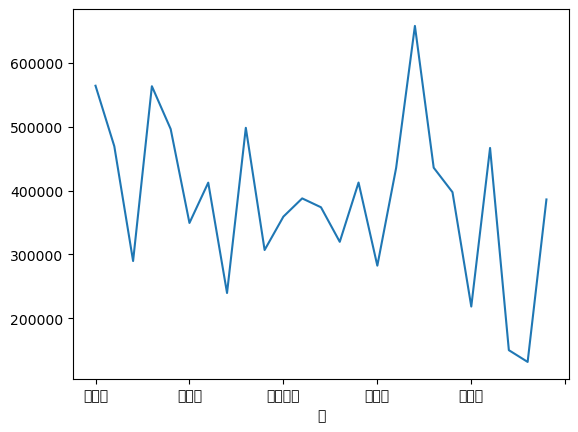

In [277]:
### (5) 인덱스 값을 '구'별 데이터로 변경하기 - groupby 활용
### (6) 구별 인구수 데이터를 바 그래프로 내림차순 정렬 후 시각화하기
df.groupby('구')['인구수'].sum().plot()

In [ ]:
# 강사님 혹시 아까 질문했던 두가지 사항에 대해 답을 아직 안주셨는데 나중에 주실 예정이신가요?!
# - 질문 다시 남겨주시면 감사하겠습니다! 

In [278]:
from selenium import webdriver

options = webdriver.ChromeOptions()  # 옵션 생성
options.add_argument("headless")     # Headless 모드 설정

# Headless 브라우저 실행
browser = webdriver.Chrome(options=options)
browser.get("https://www.naver.com")

In [280]:
browser.title # 네이버
# headless => 브라우저가 눈에 보이지 않습니다 / 다량의 데이터를 빠르게 수집해야 할 때

'NAVER'

## 시각화
### 1. Matplotlib

In [283]:
!pip install matplotlib

Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized



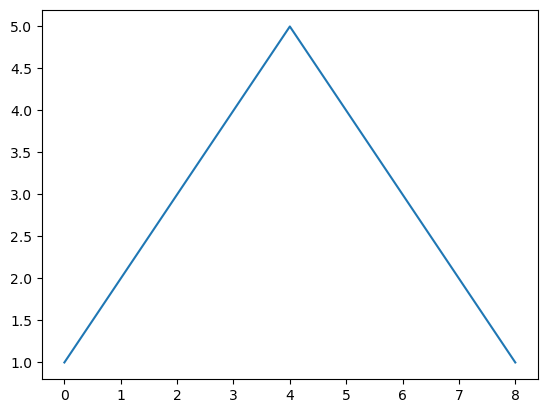

In [286]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot([1,2,3,4,5,4,3,2,1]) # x값: 리스트 인덱스값 , y값: 리스트 value 데이터
plt.show()

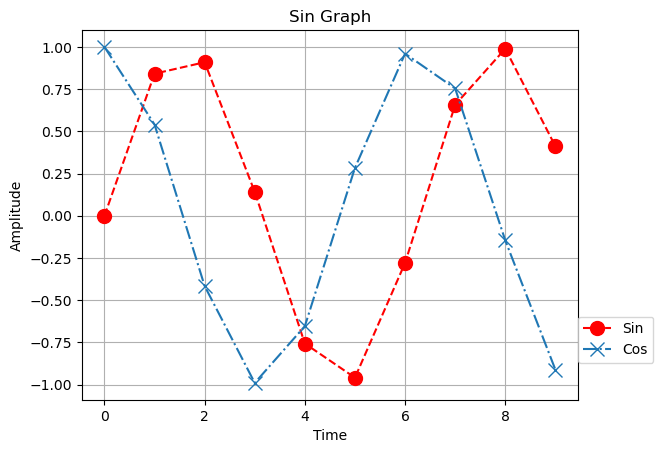

In [314]:
# sin 그래프
x = np.arange(0, 10, 1)
y = np.sin(x)
y2 = np.cos(x)

plt.plot(x,y, label = 'Sin', marker='o', markersize=10, color='red', linestyle='--')
plt.plot(x,y2, label = 'Cos', marker='x', markersize=10, linestyle='-.')

plt.title('Sin Graph')
plt.xlabel('Time') # x 라벨
plt.ylabel('Amplitude') # y 라벨

plt.legend(loc=(1,0.1)) # 범례
plt.grid() # 격자무늬

plt.show()

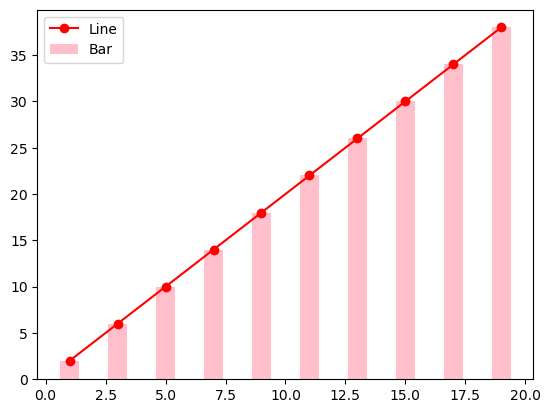

In [322]:
# 막대 그래프, 선 그래프
# (1) 같은 그래프 => (2) 각각 그래프
x_value = np.arange(1, 20, 2)
y_value = x_value * 2

plt.plot(x_value, y_value, color='red', marker='o', label='Line')
plt.bar(x_value, y_value, color='pink', label='Bar')

plt.legend()

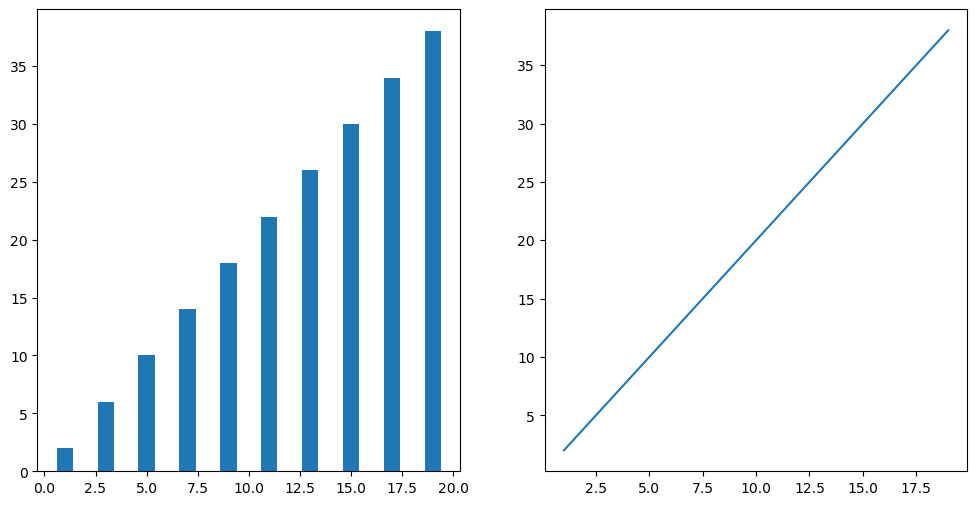

In [334]:
# (2) 각각 그래프 => plt.subplots()

fig, (ax_01, ax_02) = plt.subplots(1,2, figsize=(12,6))

ax_01.bar(x_value, y_value)
ax_02.plot(x_value, y_value)

In [339]:
# Scatter

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/datagy/data/main/KNN_data.csv')
df

# 각 레이블 데이터의 x,y 값의 위치는 어떻게 될까? => 위치가 비슷한 것들끼리 그룹핑
# (1) Label별 데이터를 분리
# df['Label'].unique()

df_large = df[df['Label'] == "Large"]
df_medium = df[df['Label'] == "Medium"]
df_small = df[df['Label'] == "Small"]

plt.scatter()

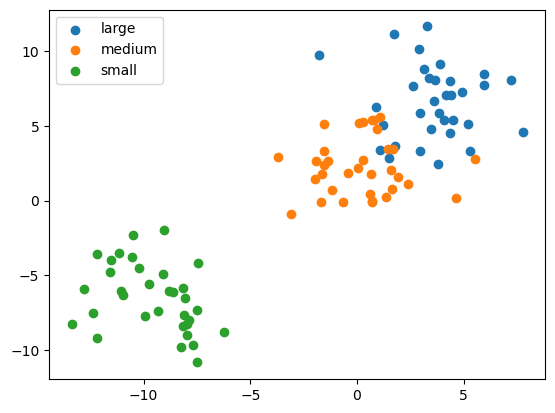

In [346]:
plt.scatter(x=df_large['x'], y=df_large['y'], label='large')
plt.scatter(x=df_medium['x'], y=df_medium['y'], label='medium')
plt.scatter(x=df_small['x'], y=df_small['y'], label='small')

plt.legend() # 고객 세그먼트

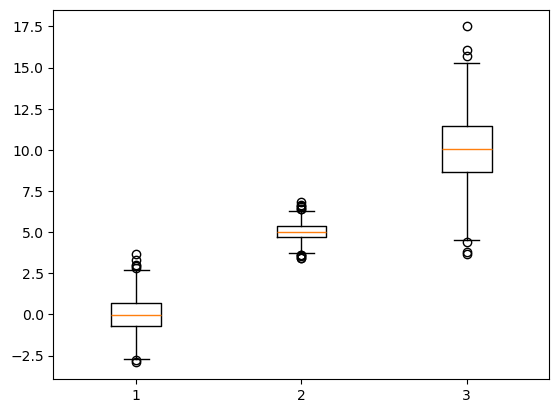

In [350]:
# Boxplot (상자 도표)
a1 = np.random.normal(loc=0, scale=1, size=1000)
a2 = np.random.normal(loc=5, scale=0.5, size=1000)
a3 = np.random.normal(loc=10, scale=2, size=1000)

plt.boxplot((a1, a2, a3))
plt.show()

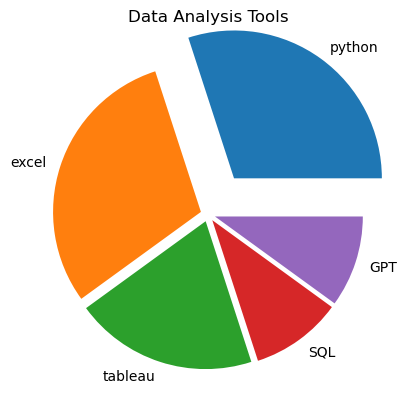

In [365]:
# 파이 그래프 (=원 그래프)
# x, y => values, labels
values = [30, 30, 20, 10, 10]
labels = ['python', 'excel', 'tableau', 'SQL', 'GPT']

plt.pie(x=values, explode=[0.3, 0.05, 0.05, 0.05, 0.05] ,labels=labels)
plt.title("Data Analysis Tools")
plt.show() # 데이터가 엄청 많아요. 엑셀로 파이차트 => 못그려요. 분석가들이 개발자처럼 맥북..=> X

# 한달, 최근 3개월, 6개월, 1년 => 컬럼 2~3개, .....

<BarContainer object of 3 artists>

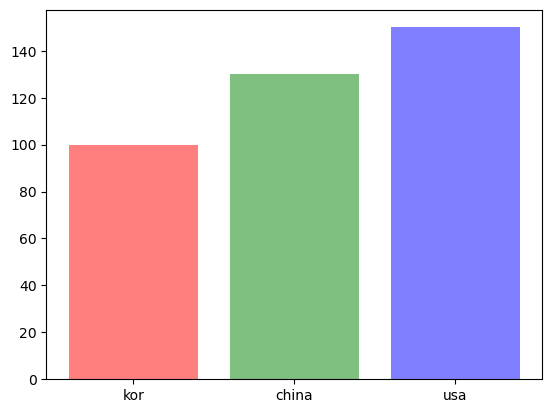

In [372]:
# 막대 그래프
x=['kor', 'china', 'usa']
height=[100, 130, 150]
colors=['r', 'g', 'b']

plt.bar(x=x, height=height, color=colors, alpha=0.5)

# 상황: 여러분은 미국 법인장입니다. 한국에 있는 회장님께 미국 법인을 좀 더 지원해주세요.
# 어떻게하면 더 어필을 잘 할 수 있을까요? => ylim

(90.0, 155.0)

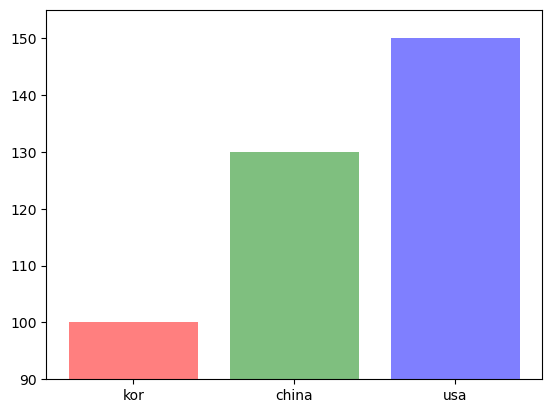

In [378]:
x=['kor', 'china', 'usa']
height=[100, 130, 150]
colors=['r', 'g', 'b']

plt.bar(x=x, height=height, color=colors, alpha=0.5)
plt.ylim(90, 155)

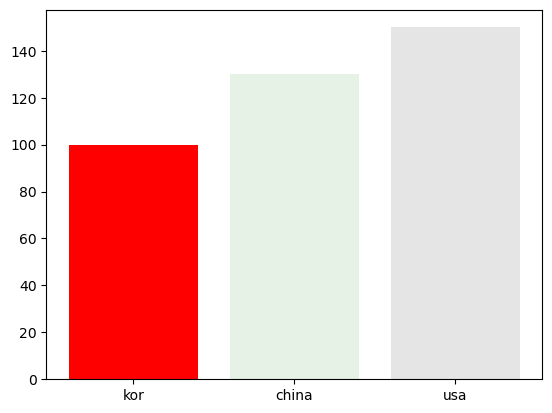

In [396]:
x=['kor', 'china', 'usa']
height=[100, 130, 150]
colors=['r', 'g', 'k'] # GPT
alpha = [1, 0.1, 0.1]
# plt.bar(x=x, height=height, color=colors, alpha=0.5)

for i in zip(x, height, colors, alpha):
    plt.bar(x=i[0], height=i[1], color=i[2], alpha=i[3])

# 17:10분에 오시면 복습, 문제 => 마무리

In [399]:
# zip 은 같은 개수의 리스트들을 순서별로 묶어주는 기능인가요?
x=['kor', 'china', 'usa']
height=[100, 130, 150]
colors=['r', 'g', 'k']

for i in zip(x, height, colors):
    print(i)

('kor', 100, 'r')
('china', 130, 'g')
('usa', 150, 'k')


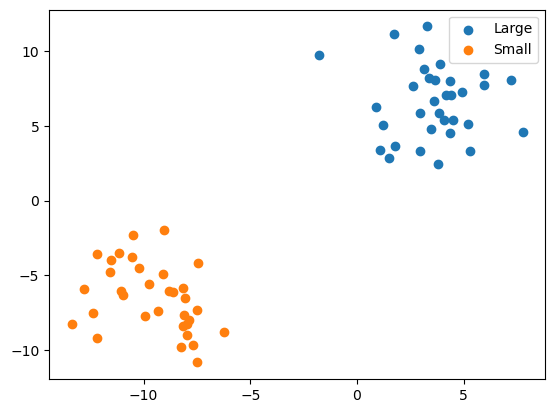

In [413]:
# Scatter에서 각 레이블 데이터 분리 잠깐 복습해주실 수 있나요? 😭

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/datagy/data/main/KNN_data.csv')

# plt.scatter(df['x'], df['y'])
# df['Label'].unique()

df_large = df[df['Label'] == 'Large']
df_small = df[df['Label'] == 'Small'] # Ctrl + Shift + 방향키 밑으로

plt.scatter(df_large['x'], df_large['y'], label='Large')
plt.scatter(df_small['x'], df_small['y'], label='Small')
plt.legend()

# 데이터 분석 => 요즘은 인생 바꾸는 건 한순간인 것 같습니다. => 인터넷이 있잖아요. => 알고리즘 간택을
# 슬릭백(춤 학원 운영하고 있었다면? => 크록스 링크, 본인 크록스 본사 협의)

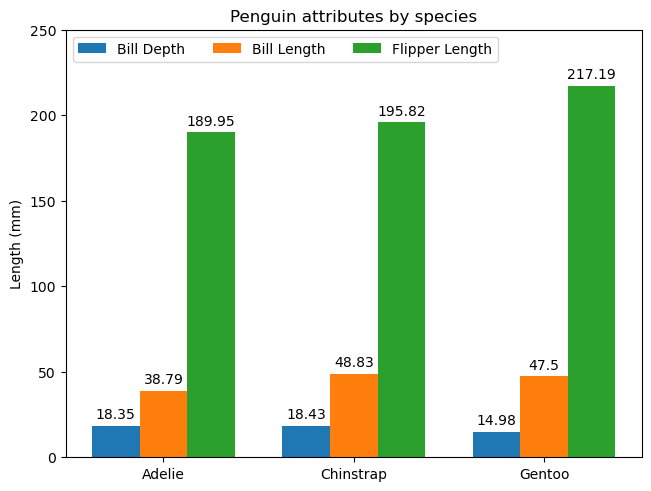

In [414]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

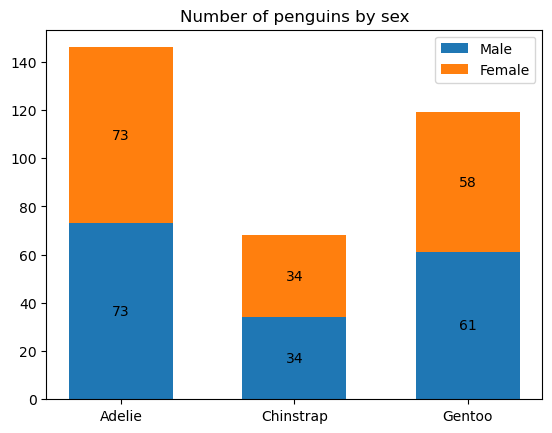

In [415]:
species = ('Adelie', 'Chinstrap', 'Gentoo')
sex_counts = {
    'Male': np.array([73, 34, 61]),
    'Female': np.array([73, 34, 58]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for sex, sex_count in sex_counts.items():
    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom)
    bottom += sex_count

    ax.bar_label(p, label_type='center')

ax.set_title('Number of penguins by sex')
ax.legend()

plt.show()

In [416]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    '영화' : ['명량', '극한직업', '신과함께-죄와 벌', '국제시장', '괴물', '도둑들', '7번방의 선물', '암살'],
    '개봉 연도' : [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
    '관객 수' : [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270], # (단위 : 만 명)
    '평점' : [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10]
}
df = pd.DataFrame(data)
df

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


In [424]:
# plt.rc('font', family='NanumBarunGothic')
# plt.rc('font', family='Malgun Gothic') #win
plt.rc('font', family='AppleGothic') #mac

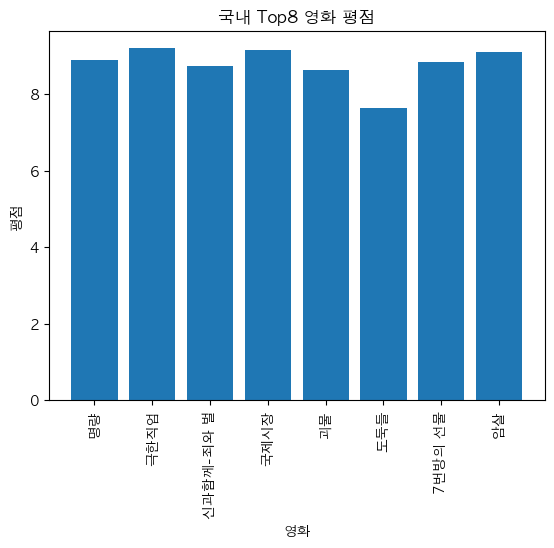

In [436]:
## 1. 영화 데이터를 활용하여 x 축은 영화, y축은 평점인 막대(bar) 그래프를 만드시오.
## (1) 막대그래프
## (2) x=영화, height=평점

## 2. 앞에서 만든 막대 그래프에 제시된 세부 사항을 적용하시오.
## - 제목: 국내 Top 8 영화 평점 정보
## - x축 label: 영화 (90도 회전)
## - y축 label: 평점

x=df['영화']
height=df['평점']

# plt.figure(figsize=(12,8)) # 도화지 옵션

plt.title("국내 Top8 영화 평점")
plt.bar(x, height)
plt.xlabel('영화')
plt.xticks(rotation=90)
plt.ylabel('평점')
plt.show()

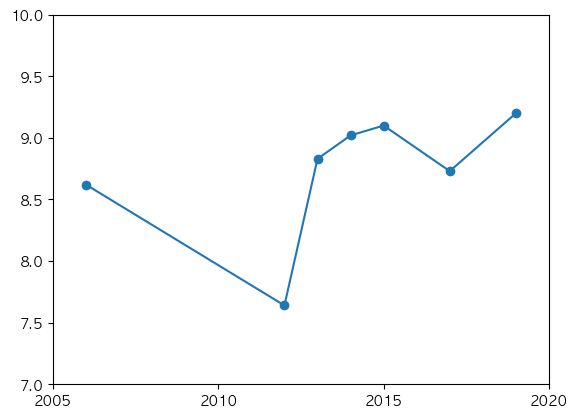

In [449]:
## 3. 개봉 연도별 평점 변화 추이를 꺾은선 그래프(plot)로 그리시오.
## (1) 개봉 연도별 평점
## (2) x축에는 연도 데이터가 들어가야 하고, y축에는 평점 데이터가 들어가면 되겠네요.

## 4 앞에서 만든 그래프에 제시된 세부 사항을 적용하시오.
## - marker: 'o'
## - x축 눈금: 5년 단위 (2005, 2010, 2015, 2020)
## - y축 범위: 최소 7, 최대 10

df_개봉연도 = df.groupby('개봉 연도')['평점'].mean()
plt.plot(df_개봉연도.index, df_개봉연도.values, marker='o')
plt.xticks([2005, 2010, 2015, 2020])
plt.ylim(7, 10)
plt.show()

### (2) Seaborn
- matplotlib을 기반으로 업데이트해서 만들어진 시각화 라이브러리
- 색상이 되게 예쁩니다. => 계산할 때 시간이 조금 오래걸리는 단점

In [450]:
!pip install seaborn

Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized



In [452]:
import seaborn as sns

df = sns.load_dataset('tips')
df

# 여러분들은 알바 컨설턴트 입니다.
# 의뢰인이 아래의 데이터를 들고 찾아왔습니다.
# Q1.이 분은 언제 일을 했을 경우에 가장 많은 팁을 받을 수 있을까요?
# Q2.그리고 누구에게 서빙을 해야 가장 많은 팁을 받을 수 있을까요?
# => 이유도 함께 제시해주세요.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [460]:
# Q1.이 분은 언제 일을 했을 경우에 가장 많은 팁을 받을 수 있을까요? => 요일, 시간
# 각 요일별, 시간별 팁 데이터의 평균

df.groupby('day')['tip'].mean()
# Sat     2.993103
# Sun     3.255132

df.groupby('time')['tip'].mean()
# Lunch     2.728088
# Dinner    3.102670

df.groupby(['day', 'time'])['tip'].mean()
df.groupby(['day', 'time'])['tip'].sum()
df.groupby(['day', 'time'])['tip'].size() # 갯수

# 토요일 저녁 - 평균은 일요일보다 낮으나, 전체 합이 높다는 것은 => 잭팟성 팁 (평균보다 높은 금액)
# 일요일 저녁 - 전체 합은 토요일보다 낮으나, 안정적인 팁 데이터 확보 가능 => 안정성 무게
# 토요일 => 87팀, 일요일 => 76팀

day   time  
Thur  Lunch     61
      Dinner     1
Fri   Lunch      7
      Dinner    12
Sat   Lunch      0
      Dinner    87
Sun   Lunch      0
      Dinner    76
Name: tip, dtype: int64

In [461]:
df.shape

(244, 7)

In [462]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [463]:
df.index

RangeIndex(start=0, stop=244, step=1)

In [464]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [467]:
df.info()
df.isna().sum()

# type에 category가 있는데 category로 설정하는 과정을 간단하게 보여주실 수 있을까요?
df['smoker'].astype('category')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


0       No
1       No
2       No
3       No
4       No
      ... 
239     No
240    Yes
241    Yes
242     No
243     No
Name: smoker, Length: 244, dtype: category
Categories (2, object): ['Yes', 'No']

<Axes: ylabel='tip'>

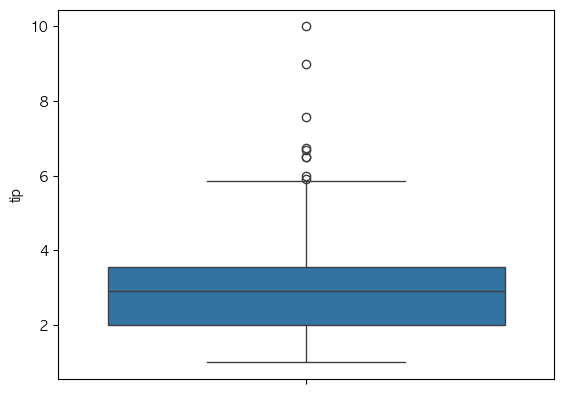

In [468]:
sns.boxplot(y=df['tip'])

<Axes: xlabel='day', ylabel='tip'>

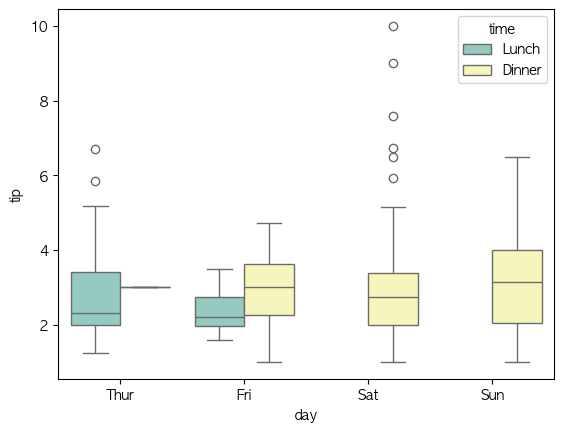

In [473]:
sns.boxplot(data=df, x='day', y='tip', palette='Set3', hue='time')
# 토,일 중 저녁에 일한다

In [482]:
# Q2.그리고 누구(sex, smoker)에게 서빙을 해야 가장 많은 팁을 받을 수 있을까요? => WHO

# 토요일. 일요일 중 하루

조건1 = df['day'] == 'Sat'
조건2 = df['day'] == 'Sun'

df[조건1].groupby(['sex', 'smoker'])['tip'].mean() # 토요일

sex     smoker
Male    Yes       2.879259
        No        3.256563
Female  Yes       2.868667
        No        2.724615
Name: tip, dtype: float64

In [479]:
df.loc[조건2, :].groupby(['sex', 'smoker'])['tip'].mean() # 토요일

sex     smoker
Male    Yes       3.521333
        No        3.115349
Female  Yes       3.500000
        No        3.329286
Name: tip, dtype: float64

In [480]:
df.groupby(['day', 'sex', 'smoker'])['tip'].mean() # 토요일

day   sex     smoker
Thur  Male    Yes       3.058000
              No        2.941500
      Female  Yes       2.990000
              No        2.459600
Fri   Male    Yes       2.741250
              No        2.500000
      Female  Yes       2.682857
              No        3.125000
Sat   Male    Yes       2.879259
              No        3.256563
      Female  Yes       2.868667
              No        2.724615
Sun   Male    Yes       3.521333
              No        3.115349
      Female  Yes       3.500000
              No        3.329286
Name: tip, dtype: float64

<Axes: xlabel='day', ylabel='tip'>

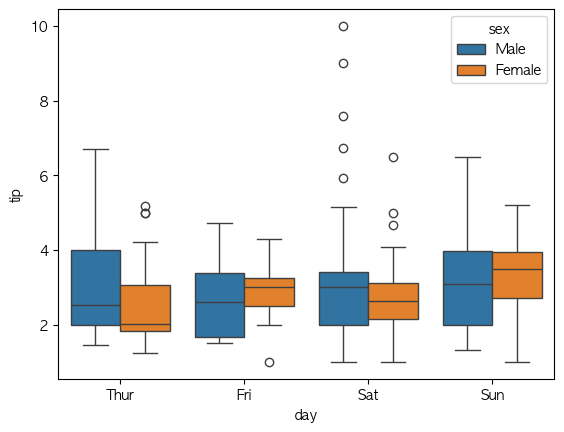

In [483]:
sns.boxplot(data=df, x='day', y='tip', hue='sex') # 토요일 - 남성, 일요일 - 여성

In [486]:
sns.boxplot(data=df[df['day']=='Sat'], x='smoker', y='tip', hue='sex')

# sns.boxplot(data = df, x='day', y='tip',hue='sex')
# 혹시 여기서 smoker 변수를 더할 수 있는 방법이 있나요? 팔레트로 시도해보니 오류가 떴습니다

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 87 and the vector passed to `hue` has length 2.

#### Lmplot - 컬럼들간의 선형 관계를 파악할 수 있는 그래프

회귀분석(Regression Analysis) => y = ax + b
- 독립변인이 종속변인에 미치는 영향을 알아보고자 할 때 사용

상관관계
- -1 ~ 1 사이의 값을 가집니다.
- 1에 가까울수록 양의 상관관계
- ex) (1) 키-몸무게: 키가 클수록=>몸무게가 많이 나갈 가능성이 높다. (100%-X)
- ex) (2) 그룹수-전체금액: 그룹의 사람수가 많을수록 전체계산금액이 높을 가능성이 있다.

- -1에 가까울수록 음의 상관관계
- ex) (1) 평균속도-연비: 평균 속도가 높을수록 연비는 낮아진다.
- ex) (2) 독감접종률-감염률: 독감접종율이 높을수록 감염율은 낮아진다.

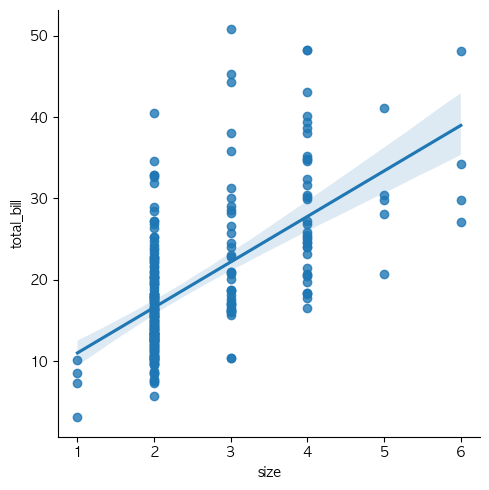

In [488]:
# 그룹 집단이 클수록 => 계산 금액이 많이 나올까?
sns.lmplot(data=df, x='size', y='total_bill')

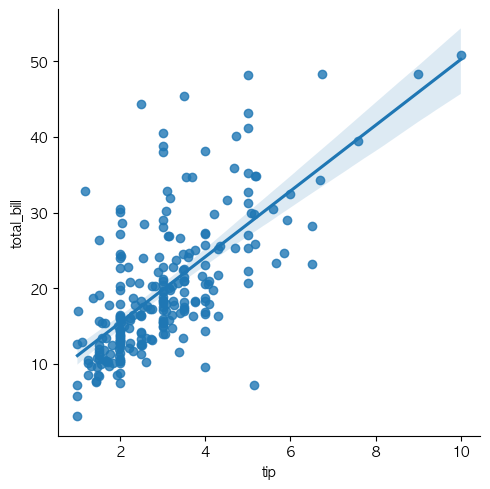

In [495]:
sns.lmplot(data=df, x='tip', y='total_bill')
# 오차범위가 클수록 이상치가 많은 카테고리라는 뜻인가요?

In [496]:
# 아까 상관관계가 -1~1 사이의 값을 가진다고하셨는데, 
# 저 직선이 얼마의 상관관계의 수치를 가지는지는 어떻게 알 수 있나요?
# corr()

df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [501]:
# 회귀방정식 y = ax + b (y:팁, 계산 금액에 따른 팁 예상액)
# 대표님이 광고비를 1백만원 => 5백만원 (기대값) => 왜요?

import numpy as np

x = np.array([1,2,3,4,5]) # total_bill - 독립변수
y = np.array([2,4,6,8,10]) # tip - 종속변수

m, b = np.polyfit(x, y, 1) # m: 기울기, b: 절편

array([ 2.,  4.,  6.,  8., 10.])

In [509]:
x = 3
y = m*x + b

y

5.999999999999998

In [510]:
b

3.9720546451956367e-16

In [511]:
x = df['total_bill']
y = df['tip']

m, b = np.polyfit(x, y, 1)

(0.10502451738435341, 0.9202696135546733)

In [512]:
y = m * x + b

In [521]:
x = 10 # total_bill
m * x + b

1.9705147873982074

In [516]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


/Users/inseop/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.draw()
/Users/inseop/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  func(*args, **kwargs)


Object `있나요` not found.


/Users/inseop/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


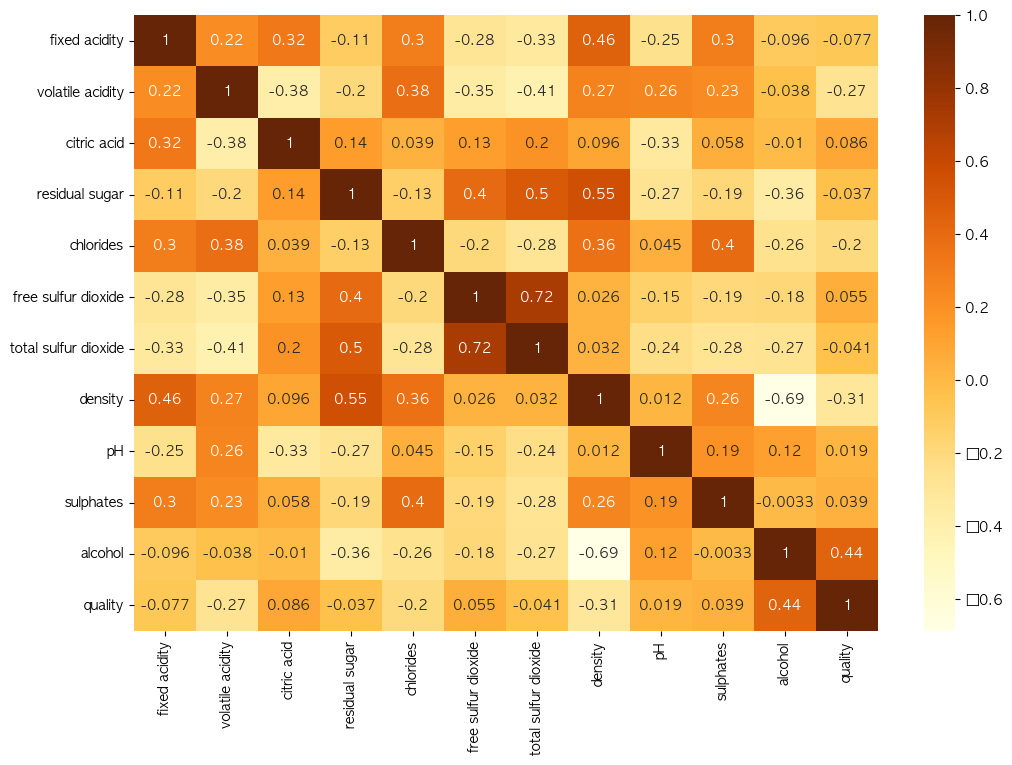

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

In [535]:
df = pd.read_csv('winequality.csv')
# df.corr(numeric_only=True)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='YlOrBr')

In [539]:
# 히트맵 => 상관관계 => 시계열 (전국민이 주간마다 보는 시계열 데이터)

# df = sns.load_dataset('flights')
df # 데이터를 쌓을 때 기본은 버티컬로 쌓아야 합니다. => 분석할 때는 이슈 => 한눈에 보기편하게 변경(pivot)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


<Axes: xlabel='year', ylabel='month'>

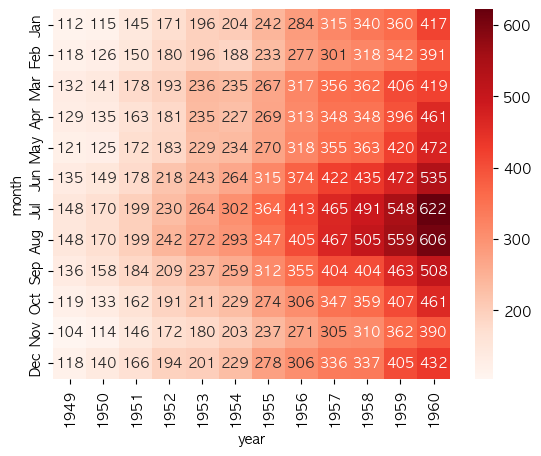

In [548]:
df_pivot = df.pivot(index="month", columns='year', values='passengers')

sns.heatmap(df_pivot, annot=True, fmt="d", cmap="Reds")

# 지금은 숫자가 커질수록 연해지고 있는데 반대로 진해지게 하는 방법이 있을까요?

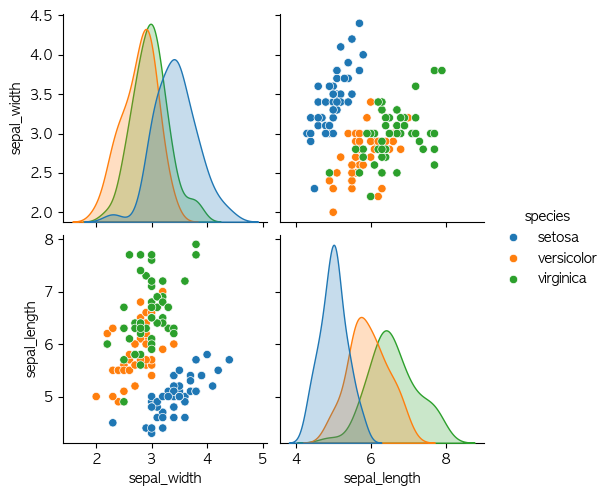

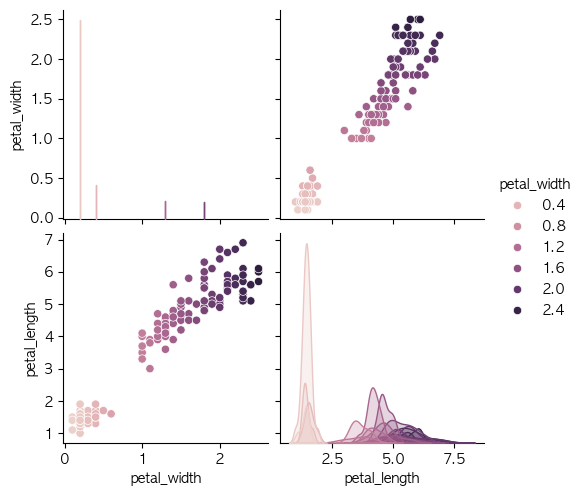

In [555]:
# lmplot => 업그레이버전: pairplot
# - 여러 변수 간의 산점도 그래프
# - 각 컬럼별 모든 상관 관계를 시각화

# df.corr() => 시각화 (pairplot)

df = sns.load_dataset('iris')
sns.pairplot(df, hue='species', vars=['sepal_width', 'sepal_length'])
sns.pairplot(df, hue='species', vars=['petal_width', 'petal_length']) # petal: 꽃잎의 길이와 넓이

# hue는 특정값을 뽑을 때 사용하나요 ? => 카테고리 데이터를 뽑을 때

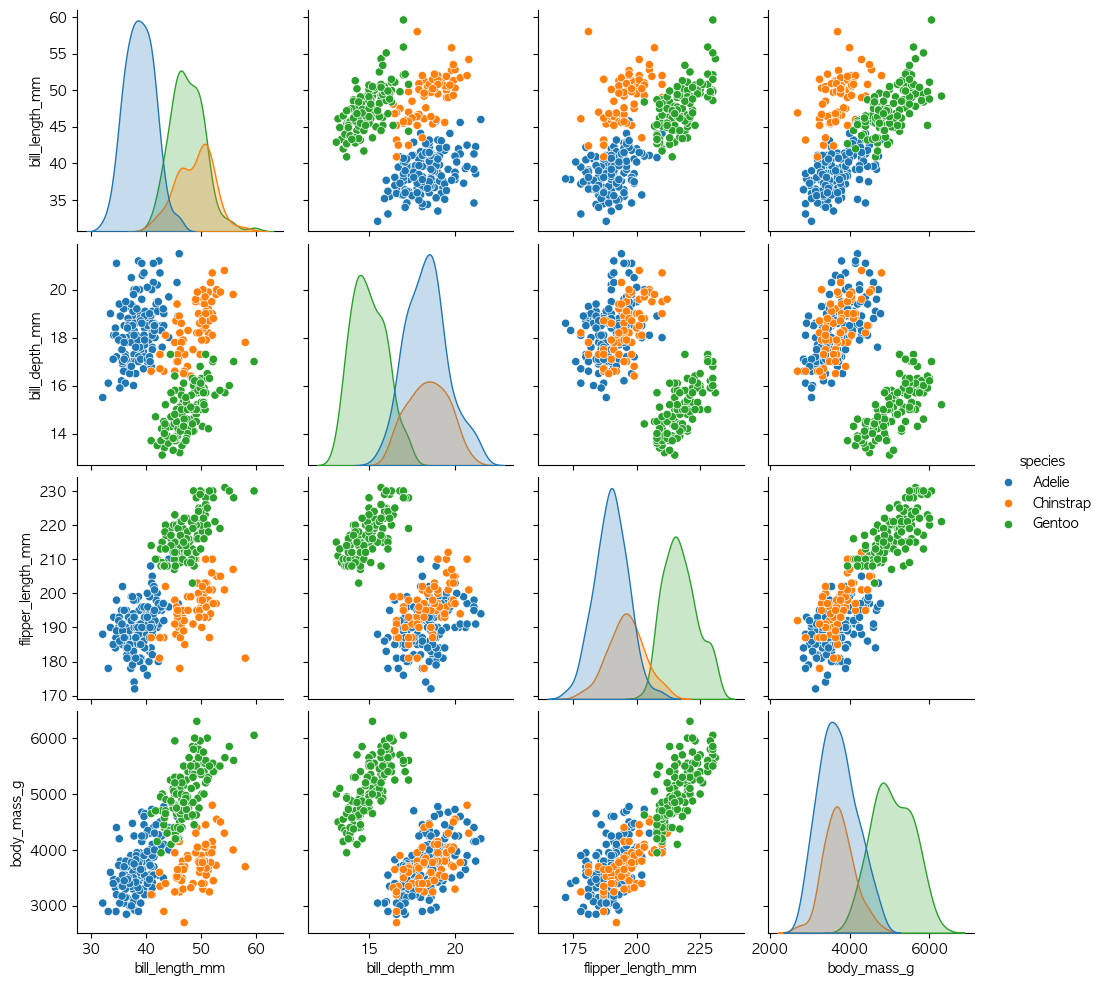

In [560]:
df = sns.load_dataset('penguins')
sns.pairplot(df, hue='species') # 백화점 => 문화센터

## 런던 바이크

In [562]:
import os
os.getcwd()

# 근데 제가 제일 못했었는데... => 역전
# 분석 => 대표님 감사합니다. 덕분에 살았습니다.! => 한국에 파이썬, 테블로, 엑셀, SQL => ???
# 크몽 => 프로젝트 3만원 => 30만원 => 300만원 ... => RS(Revenue Share) => 주식(-스타트업 배당)

'/Users/inseop/Downloads/source/파이썬교재/Part3. 데이터 분석 (numpy, pandas, matplotlib)'

In [607]:
import pandas as pd

df = pd.read_csv('london_merged.csv', parse_dates=['timestamp'])
df

# 런던 시청의 데이터 분석가 입니다. 
# 이번 프로젝트의 목표는 산탄데르 바이크 수요 예측을 하는 것 입니다.

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [608]:
df.info() # 0   timestamp     17414 non-null  datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [594]:
# 1. 시계열 데이터 분석
# - 산탄데르 바이크의 시간대별 수요 파악

# (1) 문자열 파싱하는 방법을 사용한 경우
# df.info()
# 시간 데이터
# 연 월 일, 시간

data = '2015-01-04 14:15:16'

year = data.split(" ")[0].split('-')[0]
month = data.split(" ")[0].split('-')[1]
day = data.split(" ")[0].split('-')[2]
# year, month, day

hour = data.split(" ")[1].split(":")[0]
minute = data.split(" ")[1].split(":")[1]
second = data.split(" ")[1].split(":")[2]

hour, minute, second

('14', '15', '16')

In [616]:
# (2) datetime 데이터타입을 활용

df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['dayofweek'] = df['timestamp'].dt.dayofweek # 월화수목금토일 # day ? dayofweek?
df['hour'] = df['timestamp'].dt.hour

df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,1,19
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,1,20
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,1,21
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,1,1,22


<Axes: xlabel='hour'>

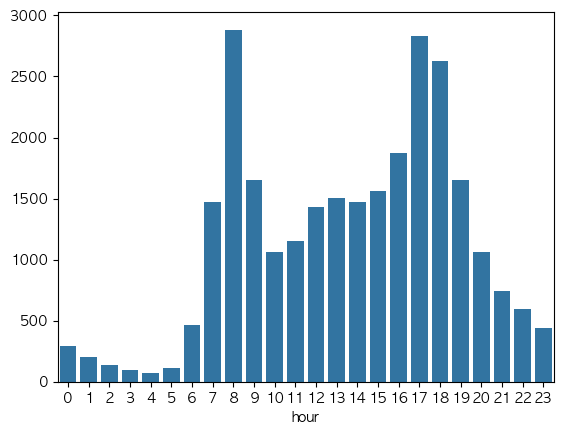

In [623]:
# 시간대별 수요예측

df_hourly_mean = df.groupby('hour')['cnt'].mean()

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=df_hourly_mean.index, y=df_hourly_mean.values)

In [ ]:
# 1. 시계열 데이터 분석 => O
# - 산탄데르 바이크의 시간대별 수요 파악

# 2. 날씨가 수요에 미치는 영향
# - 날씨와 온도, 습도가 수요에 미치는 영향

# 3. 주말 및 공휴일의 영향
# - 주말 또는 공휴일 여부가 산탄데르 바이크 수요에 미치는 영향

# 4. 계절별 수요 분석

# => 최종 결론 및 인사이트

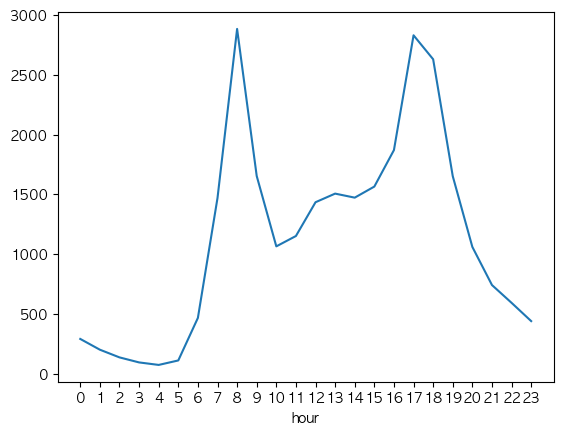

In [629]:
# 선그래프로 그렸을 때 x축에 모든 시간을 나타내도록 할 수 있을까요?
sns.lineplot(x=df_hourly_mean.index, y=df_hourly_mean.values)
plt.xticks(df_hourly_mean.index)
plt.show()

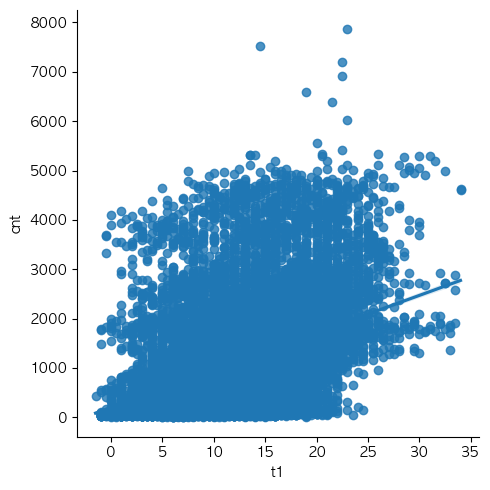

In [636]:
# 날씨가 수요에 미치는 영향
df['weather_code'].unique() # [ 3.,  1.,  4.,  7.,  2., 26., 10.]

# 날씨코드별 대여량
# sns.boxplot(data=df, x='weather_code', y='cnt')

# 온도에 따른 대여량 => 상관관계

# df.groupby('t1')['cnt'] # 온도 => 카테고리 (1~10, 1, 11~20, 2)
sns.lmplot(data=df, x='t1', y='cnt')

<Axes: xlabel='is_weekend'>

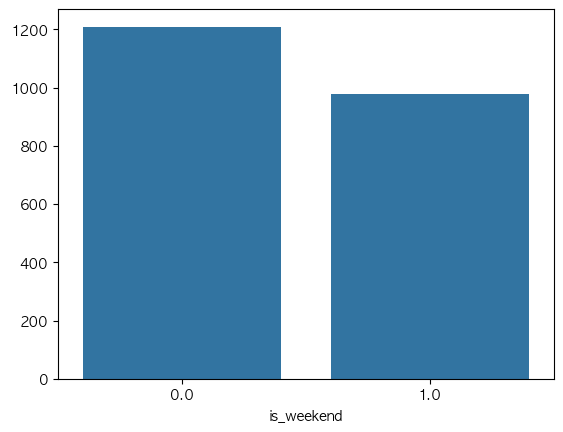

In [640]:
# 주말 및 공휴일의 영향

# df['is_weekend'].unique() # 0(non holiday), 1(holiday)

df_weekend = df.groupby('is_weekend')['cnt'].mean()
sns.barplot(x=df_weekend.index, y=df_weekend.values)

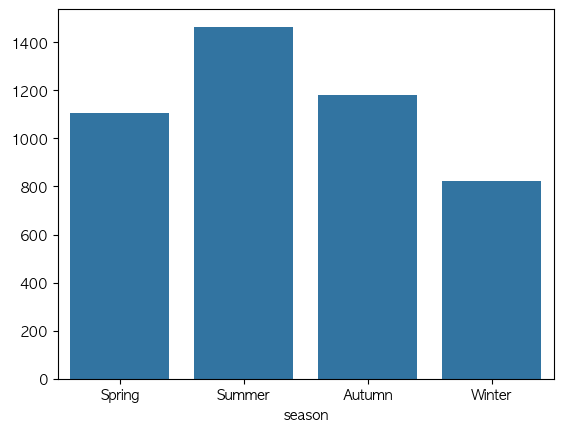

In [652]:
# 4. 계절별 수요 분석
df['season'].unique() # 0-spring ; 1-summer; 2-fall; 3-winter.

df_season = df.groupby('season')['cnt'].mean()

sns.barplot(x=df_season.index, y=df_season.values)
plt.xticks([0,1,2,3], ['Spring', 'Summer', 'Autumn', 'Winter'])
plt.show()

/Users/inseop/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.draw()
/Users/inseop/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


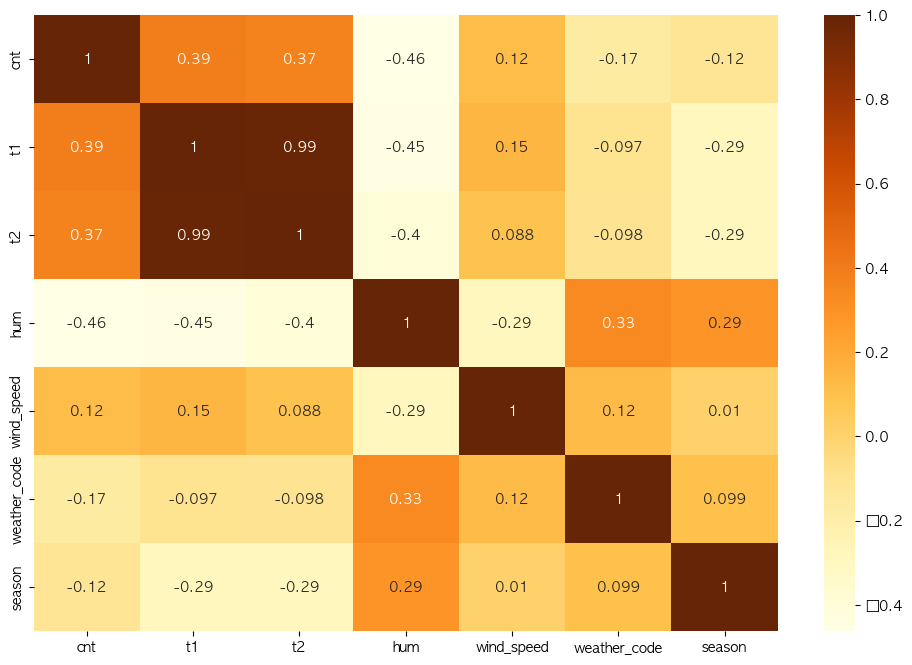

In [644]:
df_weather = df[['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'season']]

plt.figure(figsize=(12,8))
sns.heatmap(df_weather.corr(), annot=True, cmap='YlOrBr')
plt.show()
## 습도가 높을수록 cnt는 낮아진다. 풍속과 계절은 미미한 영향
# 이렇게 해봤는데 과하게 한걸까요!.. => 잘하셨습니다!! :)

# Seaborn 히트맵도 plt.figure 써서 크기 조정 가능하나요? => 넵!

<Axes: xlabel='season', ylabel='cnt'>

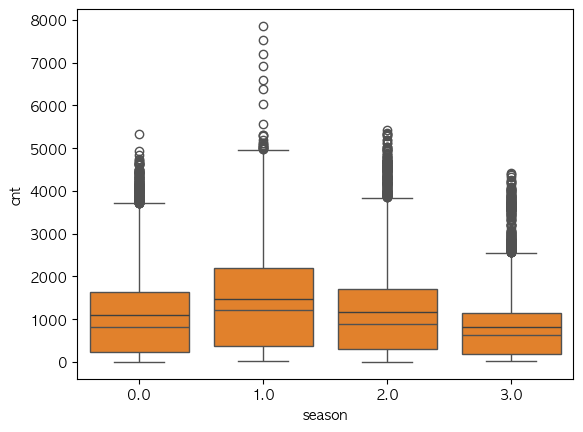

In [662]:
# sns.barplot(x = df_season.index, y = df_season.values)
# bar그래프에서만 df의 index를 사용하는 건가요? 
# 어떤 기준으로 index와 value를 x,y 값으로 사용하는지 모르겠습니다..

# 시리즈 데이터를 다룰 때
df_season.index # [0.0, 1.0, 2.0, 3.0]
df_season.values

sns.barplot(x=df_season.index, y=df_season.values)
sns.barplot(data=df, x='season', y='cnt') # seaborn 안에 pandas가 돌아가는 코드가 포함

In [665]:
df_season.index
df_season.values

array([1103.83158853, 1464.4652382 , 1178.95421799,  821.72909931])

In [668]:
# 전체 데이터
# 연도별 자전거 대여량

sns.boxplot(data=df, x='year', y='cnt')
# df['year'].value_counts()

2016    8699
2015    8643
2017      72
Name: year, dtype: int64

<Axes: xlabel='month', ylabel='cnt'>

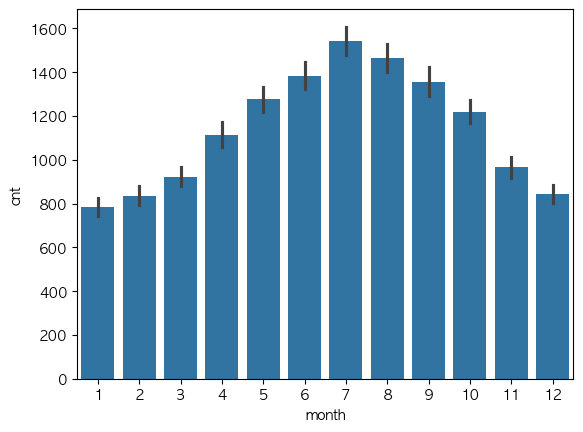

In [675]:
sns.barplot(data=df, x='month', y='cnt')

<Axes: xlabel='dayofweek', ylabel='cnt'>

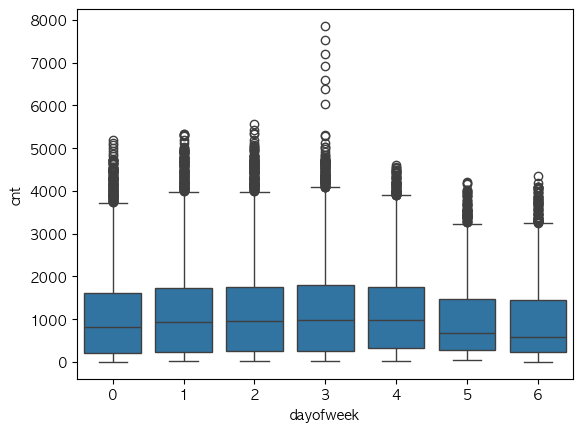

In [673]:
sns.boxplot(data=df, x='dayofweek', y='cnt')
# 0 : Sunday
# 1 : Monday
# 2 : Tuesday
# 3 : Wednesday
# 4 : Thursday
# 5 : Friday
# 6 : Saturday

<Axes: xlabel='hour', ylabel='cnt'>

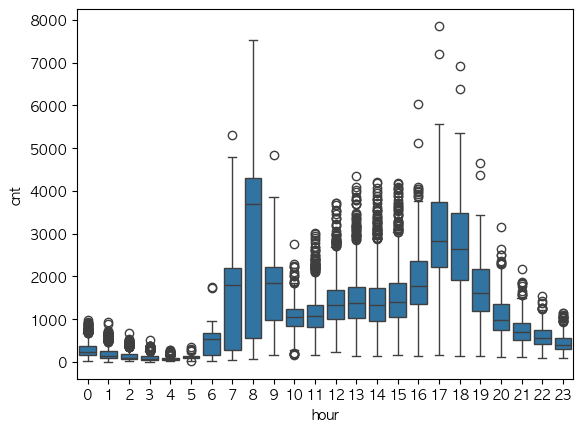

In [674]:
sns.boxplot(data=df, x='hour', y='cnt')

In [680]:
## 이상치 제거 (Outlier)

zsh:1: unknown file attribute: h


In [686]:
def is_outliers(data):
    lower_limit = data.mean() - (data.std() * 3)
    upper_limit = data.mean() + (data.std() * 3)
    
    return ~data.between(lower_limit, upper_limit)

df_remove_outliers = df[~df.groupby('hour')['cnt'].apply(is_outliers)]

df_remove_outliers

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,1,19
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,1,20
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,1,21
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,1,1,22


In [689]:
print(f"이상치 제거 전: {df.shape}")
print(f"이상치 제거 후: {df_remove_outliers.shape}")

이상치 제거 전: (17414, 14)
이상치 제거 후: (17265, 14)


In [696]:
# Apply 대신 transform 함수를 사용하면 정상 작동하는 것 같은데 어떤차이가 있는지 알 수 있을까요 ..?

df_remove_outliers = df[~df.groupby('hour')['cnt'].apply(is_outliers)]
df_remove_outliers = df[~df.groupby('hour')['cnt'].transform(is_outliers)]

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,1,19
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,1,20
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,1,21
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,1,1,22


## 타이타닉
- 탑승객의 생존 확률에 영향을 미치는 요소에는 어떤 것들이 있나요?
- 캐글도 나가볼..까요!?  => 한번 해볼게요! ML 찍먹.
- 예측모델생성, 추천모델 => 처음이라 어려울 순 있다..!

In [698]:
!pip install scikit-learn==1.0.2

zsh:1: = not found


In [699]:
import sklearn
sklearn.__version__

'1.1.3'

In [705]:
from sklearn.datasets import load_iris
iris = load_iris()

# 조금 어려우실순 있는데.. => Now or Never (+보너스)
iris.data # 피처 데이터
iris.target # 타겟 데이터 (정답 데이터)

# 꽃 데이터와 꽃 정답 데이터를 주고 꽃의 종류를 맞추는 알고리즘을 구현

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [707]:
# 150개 => 학습 데이터(80%), 테스트 데이터 (20%)
from sklearn.model_selection import train_test_split

# 학습 데이터 셋과 테스트 데이터 셋이 필요합니다.
# train_test_split()

# X_train: 학습용 피처 데이터, X_test: 테스트용 피처 데이터
# y_train: 학습용 타겟 데이터, y_test: 테스트용 타겟 데이터
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.3, random_state=123)
# KFold

In [713]:
from sklearn.tree import DecisionTreeClassifier # 분류 알고리즘

model = DecisionTreeClassifier()
model.fit(X_train, y_train) # fit: 학습하다. => 모의고사 데이터와 정답

DecisionTreeClassifier()

In [747]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [753]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [754]:
pred = model.predict(X_test) # 예측(시험): 수능 문제를 줘야겠죠. => test_data

In [755]:
# 수능 문제를 잘 풀었는지?
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred) # 예측 정확도

0.9666666666666667

In [ ]:
# test_size 를 정할 때 기준이 있나요?

In [ ]:
# 이렇게 이해했는데 맞나요?

# pred = 피처 데이터를 기반으로 한 인공지능 예측값
# accuracy = 타겟 데이터로 실제 측정해본 값과 비교해 정확도 계산(1에 가까울수록 높은 정확도)

In [ ]:
# accuracy 말고 confusion matrix 를 출력할 수도 있나요?

## 타이타닉
- 생존자 예측 모델 생성

In [757]:
# KB증권 => 대출 모델 => 법인 대출팀 - 데이터분석가 => 병원 대출 담당
# => 병원의 재무데이터, 의사수, 자산 => 대출 상환 여력 평가 모델 (DS) - 학사출신 => 석사 (회사생활 하면서)

In [758]:
import pandas as pd

df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [759]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [760]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [761]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [762]:
df.isna().sum() # Na: Age, Cabin, Embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [786]:
# 각 컬럼별 생존 확률은 어떻게 될까요?
# 1. 성별에 따른 생존율
# 2. 탑승항구에 따른 생존율
# 3. 함께 탑승한 가족수에 따른 생존율
# 4. 등급에 따른 생존율 

# 생존율 => 갯수

def make_bar(col_name):
    survived = df[df['Survived'] == 1][col_name].value_counts()
    dead = df[df['Survived'] == 0][col_name].value_counts()
    
    df_survived = pd.DataFrame({'Survived':survived, 'Dead':dead})
    df_survived.plot(kind='bar', stacked=True, figsize=(6,3))
    plt.title(f'{col_name}')

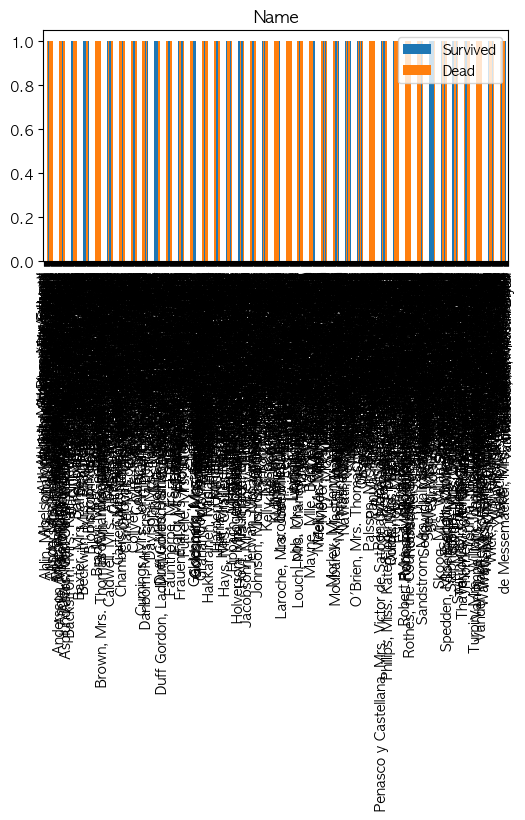

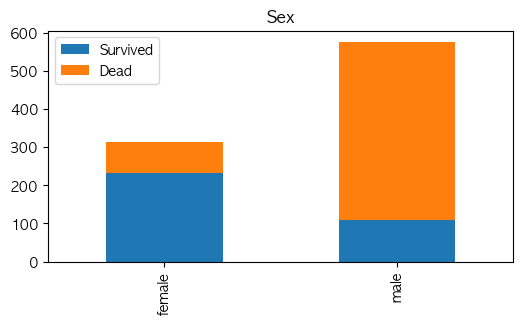

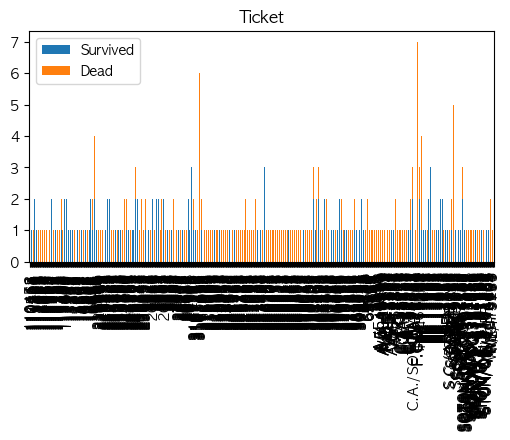

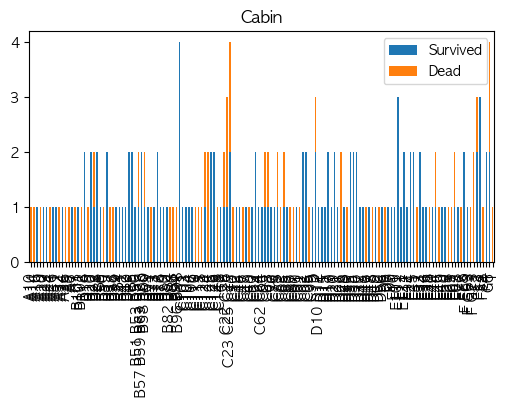

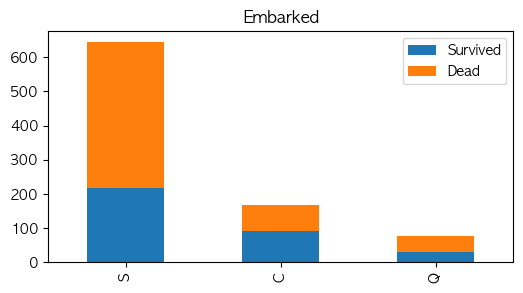

In [790]:
for i in df.columns:
    # if df[i].dtypes == 'O':
    make_bar(i)

In [789]:
# if문써서 카테고리타입인것만 적용하는건 어떻게 작성해야 성립하나요?
# 데이터 타입도 필터링되나요?
df['Sex'].dtypes

dtype('O')

In [801]:
# (1) 요금을 많이 낸 사람의 생존 확률은 어떻게 될까?
# - 요금을 가장 많이 낸 top10과 요금을 가장 적게낸 top10의 생존확률은 어떻게 다를까?
df.sort_values(by='Fare', ascending=False).head(30)['Survived'].value_counts() # 70%
df.sort_values(by='Fare', ascending=False).tail(30)['Survived'].value_counts() # 0%

# => 요금은 생존 확률에 영향을 크게 미치며, 높은 요금을 낼수록 생존확률이 높다.

0    28
1     2
Name: Survived, dtype: int64

In [807]:
# (2) 이름은 생존확률에 영향을 줬을까?
# title을 추출

# 정규표현식 => 컴공. 정규표현식 (3달)
df['Name_Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.')
df['Name_Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Name_Title, dtype: int64

In [825]:
# (3) 나이 => Age

# df['Age'].unique()
# df['Age'].mean()
df['Age'].isna().sum() # 나이의 값을 채우고 싶다.

# (1) 나이의 전체 평균을 빈 값에 채워넣는다.
df['Age'].fillna(value=df['Age'].mean())

# (2) Name_Title => 나이를 추측 (투 뎁스로 나이를 채워넣는다)
df[df['Age'].isna() == True]

df_title_mapper = df.groupby('Name_Title')['Age'].mean()
df_title_mapper

# 비어있는 나이에 데이터를 넣어보도록 하겠습니다.
# df['Age'].fillna()

df['Age_New'] = df['Age'].fillna(df['Name_Title'].map(df_title_mapper))

In [830]:
# 범주형 데이터 => 구간을 나눠줘야 합니다.

import numpy as np
bins = [0,7,19,49,np.inf]
labels = ['Child', 'Youth', 'Young', 'Senior'] # Child: 0~7, Youth:8~19 ...

df['Age_Category'] = pd.cut(df['Age_New'], bins=bins, labels=labels)
df['Age_Category']

0      Young
1      Young
2      Young
3      Young
4      Young
       ...  
886    Young
887    Youth
888    Young
889    Young
890    Young
Name: Age_Category, Length: 891, dtype: category
Categories (4, object): ['Child' < 'Youth' < 'Young' < 'Senior']

50     Child
278    Child
535    Child
Name: Age_Category, dtype: category
Categories (4, object): ['Child' < 'Youth' < 'Young' < 'Senior']

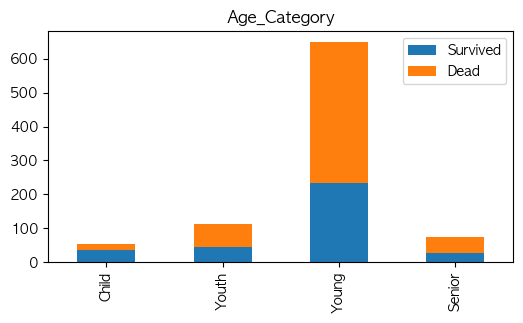

In [832]:
make_bar('Age_Category')
df[df['Age_New'] == 7]['Age_Category']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title,Age_New,Age_Category,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,22.000000,Young,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,38.000000,Young,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,26.000000,Young,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,35.000000,Young,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,35.000000,Young,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,27.000000,Young,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,19.000000,Youth,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,21.773973,Young,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,26.000000,Young,1


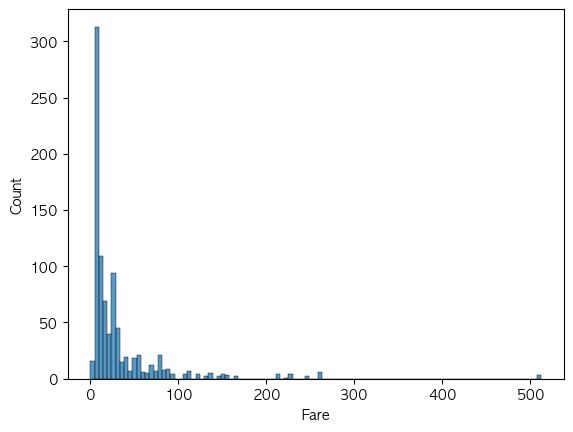

In [842]:
# Fare => 구간으로 나눠볼게요.
sns.histplot(df['Fare']) # 요금별 데이터 갯수

bins = [0, 20, 100, 250, np.inf]
labels = [0, 1, 2, 3]

df['Fare_Category'] = pd.cut(df['Fare'], bins=bins, labels=labels)
df

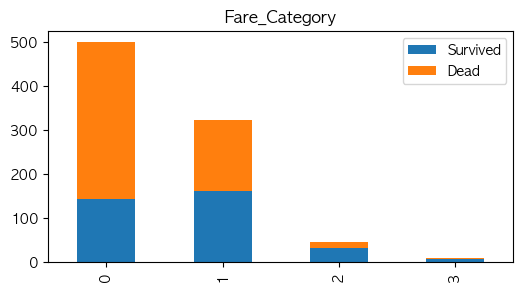

In [843]:
make_bar('Fare_Category')
# 20파운드 밑의 배값을 낸 사람들의 생존 확률이 가장 낮음.
# 가성비를 선택한다면 20파운드 이상~100파운드 미만의 돈을 내면 될 것 같음.